In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# -----------------------
# Load dataset
# -----------------------
df = pd.read_csv("grocery_dataset.csv")
df

,item,brand,store_type,season,purchase_method,qty_bought,days_used,daily_use,last_purchase_days_ago,household_size,price,discount_percent,shelf_life_days,rating,stock_status
0,eggs,PremiumSelect,wholesale,monsoon,offline,1.0,32.0,1.408963,34.000000,1.0,175.439407,2.910847,38.000000,4.375990,empty
1,oil,BrandA,online,monsoon,online,3.0,46.0,0.318556,120.208134,1.0,354.412837,13.981288,14.000000,2.455548,low
2,pasta,BrandB,wholesale,none,subscription,7.0,51.0,1.344323,2.000000,3.0,64.493736,0.638923,83.000000,3.454076,empty
3,tea,LocalBrand,local_shop,monsoon,subscription,9.0,18.0,1.457835,39.000000,1.0,126.826177,17.662789,117.000000,3.436221,low
4,NaN,BrandB,online,none,online,1.0,41.0,1.322864,NaN,5.0,391.276512,33.280544,74.000000,3.150208,empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,coffee,BrandA,local_shop,monsoon,subscription,5.0,58.0,11.627317,9.000000,1.0,140.189846,31.617043,348.316251,3.155766,empty
9996,flour,BrandC,local_shop,summer,online,5.0,29.0,0.776114,2.000000,7.0,465.034872,33.062695,195.000000,2.631374,empty
9997,tea,BrandB,local_shop,monsoon,online,5.0,43.0,1.142398,9.000000,1.0,330.124242,19.599499,24.000000,1.184988,low
9998,tea,BrandC,wholesale,winter,subscription,9.0,57.0,1.205380,6.000000,3.0,98.006319,39.036072,192.000000,22.445802,empty


In [31]:


# 1️⃣ Convert " " , "" , "?" , "NA" to NaN
df = df.replace([" ", "", "?", "NA", "N/A", "null", "None"], np.nan)

# 2️⃣ Convert numeric-like columns stored as object to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

# 3️⃣ Fill missing values
# numeric → median
for col in df.select_dtypes(include=["int64","float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

# categorical → mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter cleaning & filling:")
print(df.isnull().sum())




After cleaning & filling:
item                      0
brand                     0
store_type                0
season                    0
purchase_method           0
qty_bought                0
days_used                 0
daily_use                 0
last_purchase_days_ago    0
household_size            0
price                     0
discount_percent          0
shelf_life_days           0
rating                    0
stock_status              0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_21452\1536850424.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


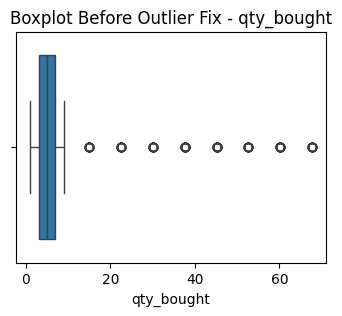

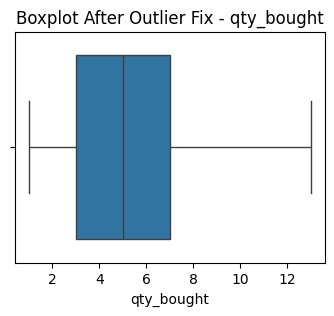

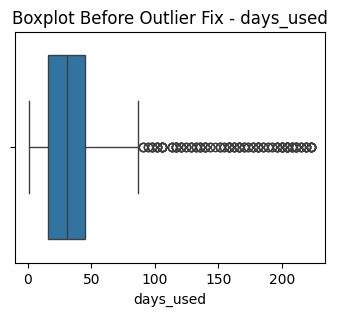

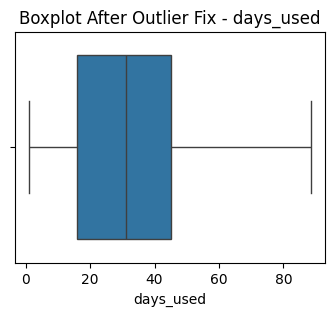

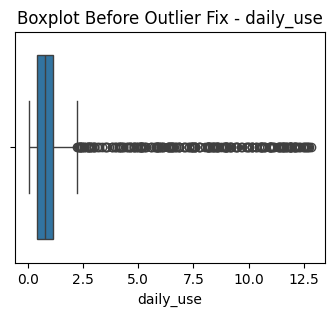

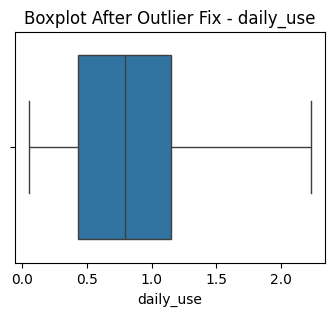

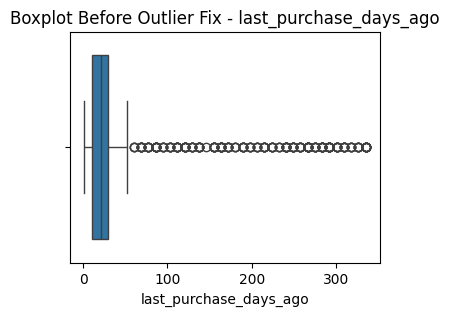

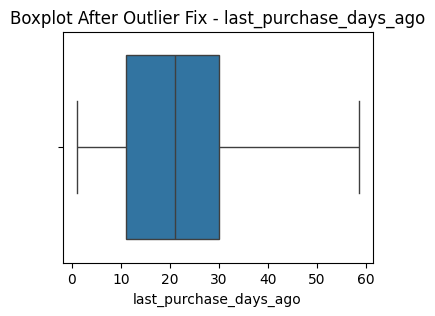

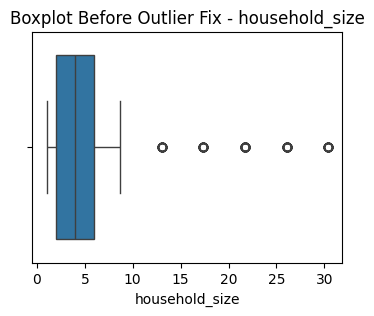

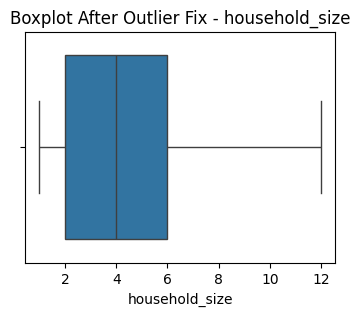

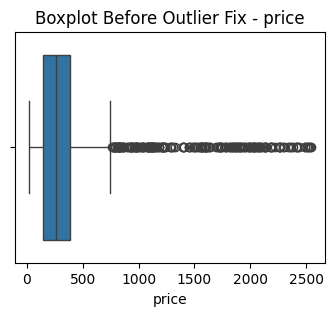

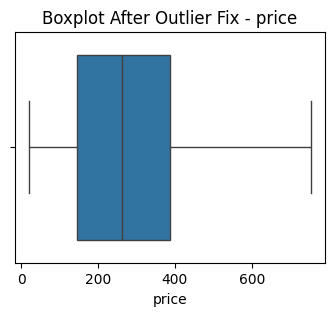

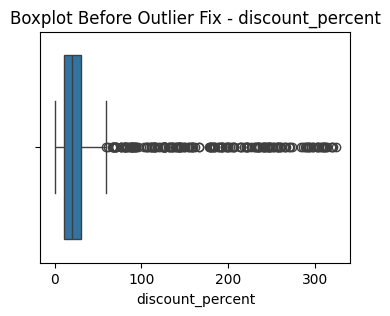

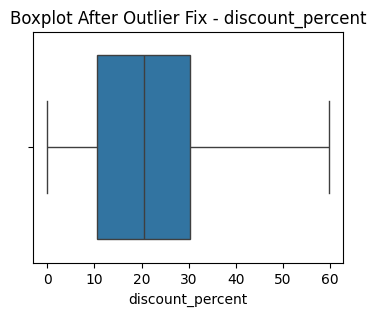

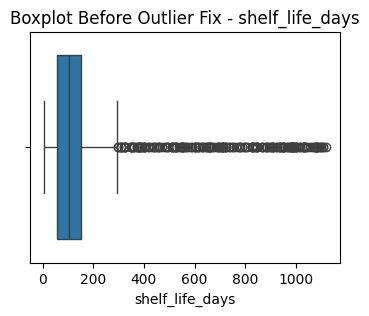

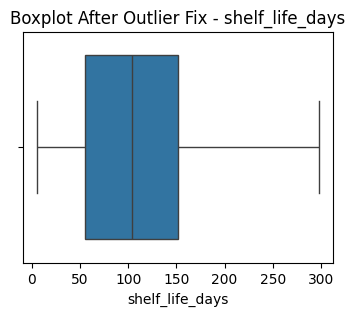

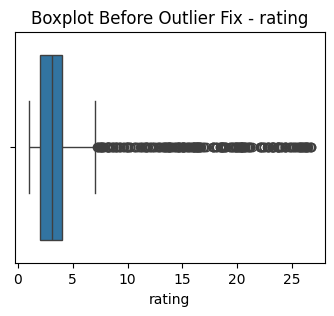

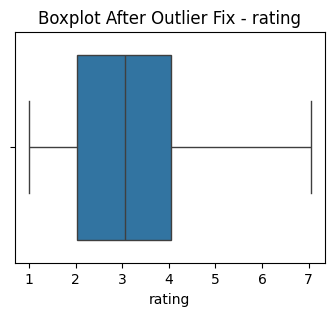

In [32]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Before Outlier Fix - {col}")
    plt.show()

    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Cap values
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

    # After fix boxplot
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Outlier Fix - {col}")
    plt.show()


In [33]:
label_encoders = {}
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


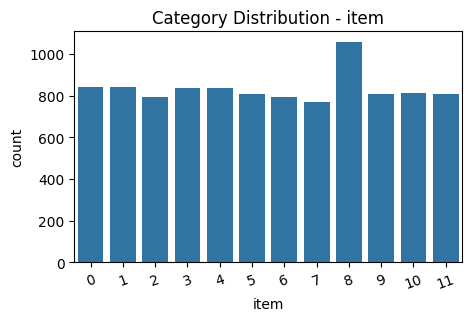

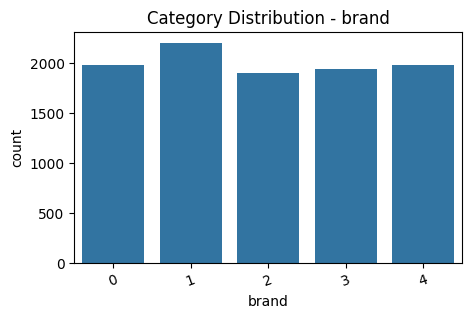

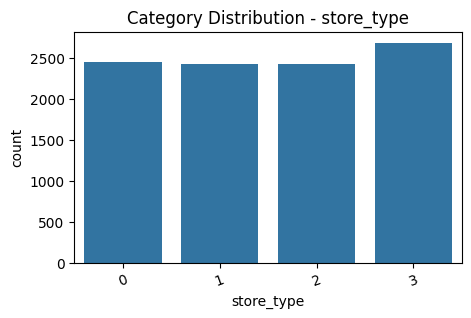

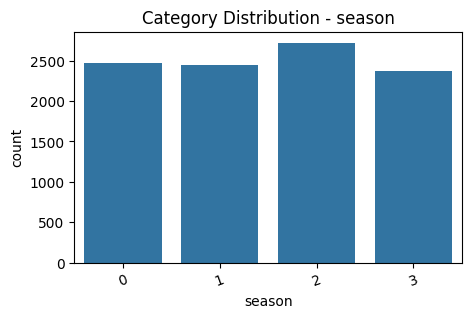

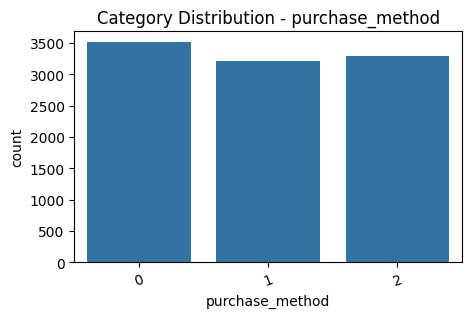

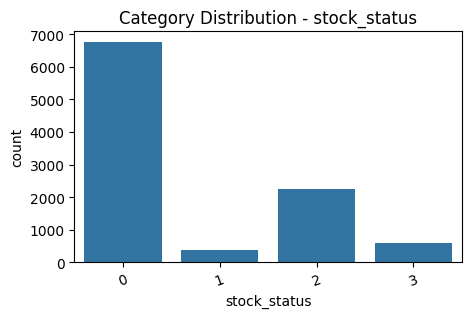

In [34]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Category Distribution - {col}")
    plt.xticks(rotation=20)
    plt.show()


In [35]:
X = df.drop("stock_status", axis=1)
y = df["stock_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))


Accuracy: 0.906

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1366
           1       0.95      0.68      0.79        80
           2       0.77      0.86      0.82       436
           3       0.82      0.53      0.64       118

    accuracy                           0.91      2000
   macro avg       0.87      0.76      0.80      2000
weighted avg       0.91      0.91      0.90      2000



In [36]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(label_encoders, open("encoders.pkl", "wb"))
pickle.dump(X.columns.tolist(), open("columns.pkl", "wb"))


In [37]:
output_mapping = {0: "low", 1: "medium", 2: "high"}   # customize if needed

def predict_stock(item, brand, store_type, season, purchase_method,
                  qty_bought, days_used, daily_use, last_purchase_days_ago,
                  household_size, price, discount_percent, shelf_life_days, rating):

    row = pd.DataFrame([[item, brand, store_type, season, purchase_method,
                         qty_bought, days_used, daily_use, last_purchase_days_ago,
                         household_size, price, discount_percent, shelf_life_days, rating]],
                       columns=X.columns)

    # safe encoding
    for col in row.columns:
        if col in label_encoders:
            le = label_encoders[col]
            val = row[col].iloc[0]
            if val not in le.classes_:
                le.classes_ = np.append(le.classes_, val)
            row[col] = le.transform([val])

    pred_num = model.predict(row)[0]
    pred_label = output_mapping.get(pred_num, "unknown")
    return pred_label


In [38]:
result = predict_stock(
    "Milk", "Amul", "kirana", "winter", "offline",
    2, 3, 1, 5, 4, 55, 2, 7, 4.5
)

print("Stock Status:", result)


Stock Status: low


In [39]:
result = predict_stock(
    item="Rice",
    brand="Aashirvaad",
    store_type="supermarket",
    season="winter",
    purchase_method="online",
    qty_bought=10,              # high
    days_used=1,                # recently used
    daily_use=0.3,              # low usage
    last_purchase_days_ago=2,   # very recent purchase
    household_size=3,
    price=68,
    discount_percent=10,
    shelf_life_days=365,
    rating=4.8
)
print("Status:", result)


Status: high


In [40]:
result = predict_stock(
    item="Sugar",
    brand="Parry's",
    store_type="kirana",
    season="summer",
    purchase_method="offline",
    qty_bought=3,               # moderate amount
    days_used=4,
    daily_use=0.4,              # average usage
    last_purchase_days_ago=10,  # bought ~10 days ago
    household_size=4,
    price=45,
    discount_percent=5,
    shelf_life_days=180,
    rating=4.1
)
print("Status:", result)


Status: low
